In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea
import numpy as np


import types
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_793c44bd059b46468e42a2635f660f1c = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='ZG1clzmpzx74zxlTMWA4CUN6u47tvLdBJAEJUumvqOtP',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_793c44bd059b46468e42a2635f660f1c.get_object(Bucket='lifeexpectancy-donotdelete-pr-bpcygkwqirieqs',Key='datasets_12603_17232_Life Expectancy Data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data = pd.read_csv(body)
data.head()



,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [2]:
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
status = pd.get_dummies(data.Status)
data = pd.concat([data, status], axis = 1)

In [4]:
data = data.drop(['Status'], axis = 1)

In [5]:
data.columns

Index(['Country', 'Year', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling', 'Developed',
       'Developing'],
      dtype='object')

In [6]:
data = data. groupby('Country').mean()
data.head()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Developed,Developing
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,2007.5,58.19375,269.0625,78.2500,0.014375,34.960110,64.562500,2362.2500,15.51875,107.5625,...,52.3125,0.10000,340.015425,9.972260e+06,16.58125,15.58125,0.415375,8.21250,0,1
Albania,2007.5,75.15625,45.0625,0.6875,4.848750,193.259091,98.000000,53.3750,49.06875,0.9375,...,98.0625,0.10000,2119.726679,6.969116e+05,1.61875,1.70000,0.709875,12.13750,0,1
Algeria,2007.5,73.61875,108.1875,20.3125,0.406667,236.185241,78.000000,1943.8750,48.74375,23.5000,...,91.8750,0.10000,2847.853392,2.164983e+07,6.09375,5.97500,0.694875,12.71250,0,1
Angola,2007.5,49.01875,328.5625,83.7500,5.740667,102.100268,70.222222,3561.3125,18.01875,132.6250,...,47.6875,2.36875,1975.143045,1.014710e+07,6.19375,6.66875,0.458375,8.04375,0,1
Antigua and Barbuda,2007.5,75.05625,127.5000,0.0000,7.949333,1001.585226,98.266667,0.0000,38.42500,0.0000,...,98.3125,0.12500,9759.305728,NaN,3.42500,3.37500,0.488625,8.84375,0,1


# EDA

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f579c18d780>,
      dtype=object)

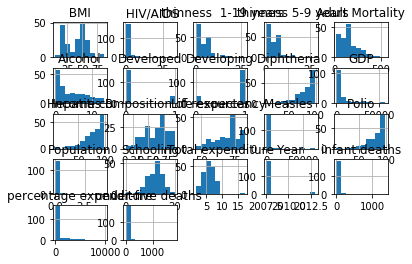

In [7]:
data.hist()

Text(0, 0.5, 'Life expectancy')

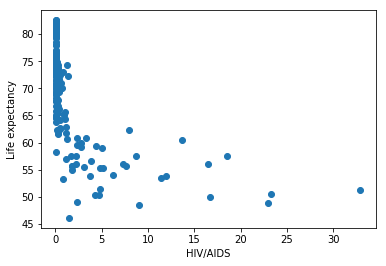

In [8]:
plt.scatter(data[' HIV/AIDS'],data['Life expectancy '])
plt.xlabel('HIV/AIDS')
plt.ylabel('Life expectancy')

Text(0, 0.5, 'Life expectancy')

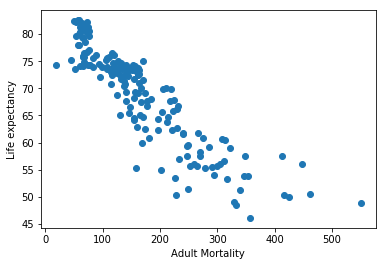

In [9]:
plt.scatter(data['Adult Mortality'],data['Life expectancy '])
plt.xlabel('Adult Mortality')
plt.ylabel('Life expectancy')

Text(0, 0.5, 'Life expectancy')

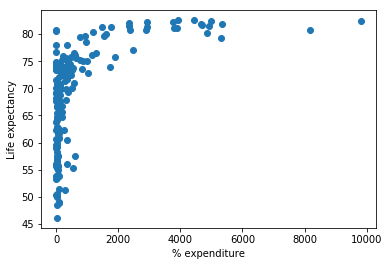

In [10]:
plt.scatter(data['percentage expenditure'],data['Life expectancy '])
plt.xlabel('% expenditure')
plt.ylabel('Life expectancy')

Text(0, 0.5, 'Life expectancy')

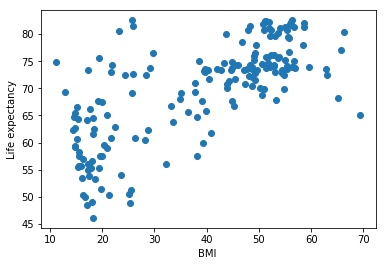

In [11]:
plt.scatter(data[' BMI '],data['Life expectancy '])
plt.xlabel('BMI ')
plt.ylabel('Life expectancy')

Text(0, 0.5, 'Life expectancy')

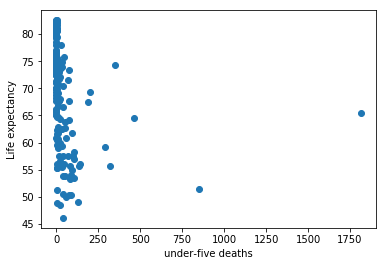

In [12]:
plt.scatter(data['under-five deaths '],data['Life expectancy '])
plt.xlabel('under-five deaths')
plt.ylabel('Life expectancy')

Text(0, 0.5, 'Life expectancy')

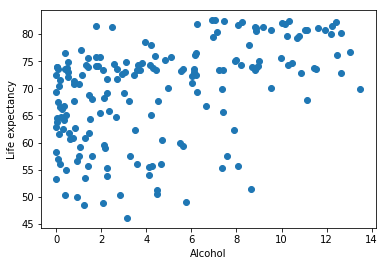

In [13]:
plt.scatter(data['Alcohol'],data['Life expectancy '])
plt.xlabel('Alcohol')
plt.ylabel('Life expectancy')

Text(0, 0.5, 'Life expectancy')

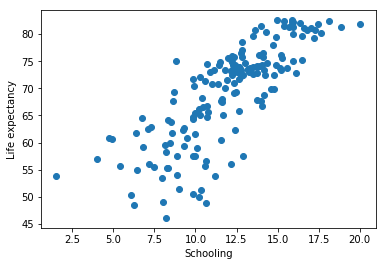

In [14]:
plt.scatter(data['Schooling'],data['Life expectancy '])
plt.xlabel('Schooling')
plt.ylabel('Life expectancy')

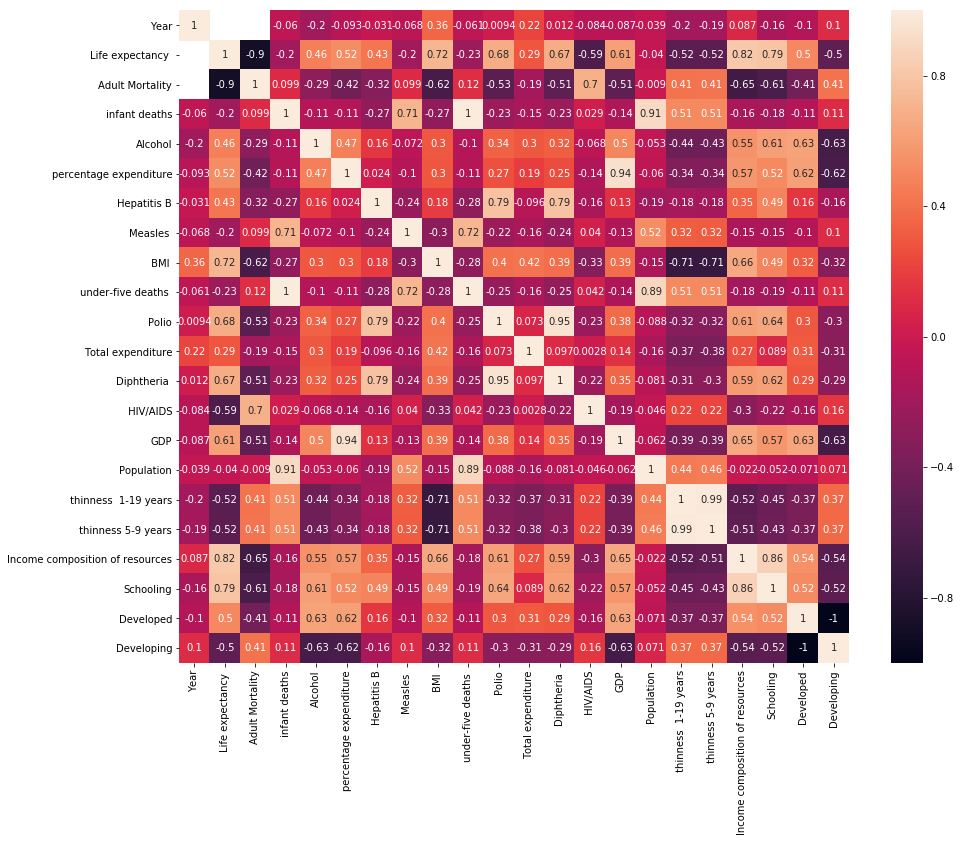

In [15]:
plt.figure(figsize = (15,12))
sea.heatmap(data.corr(), annot = True)

# Data Preprocessing

In [16]:
label =  data['Life expectancy ']
features = data.drop('Life expectancy ',axis =1)

In [17]:
features.isnull().sum()

Year                                0
Adult Mortality                    10
infant deaths                       0
Alcohol                             2
percentage expenditure              0
Hepatitis B                         9
Measles                             0
 BMI                                4
under-five deaths                   0
Polio                               0
Total expenditure                   2
Diphtheria                          0
 HIV/AIDS                           0
GDP                                30
Population                         48
 thinness  1-19 years               4
 thinness 5-9 years                 4
Income composition of resources    17
Schooling                          13
Developed                           0
Developing                          0
dtype: int64

In [18]:
label.isnull().sum()

10

In [19]:
features.fillna(value = features.mean(), inplace = True)
label.fillna(value = label.mean(), inplace = True)

In [20]:
from scipy import stats
stats.describe(features[1:])

DescribeResult(nobs=192, minmax=(array([2.00750000e+03, 1.87500000e+01, 0.00000000e+00, 1.00000000e-02,
       0.00000000e+00, 8.00000000e+00, 0.00000000e+00, 5.20000000e+00,
       0.00000000e+00, 9.00000000e+00, 1.64666667e+00, 9.00000000e+00,
       1.00000000e-01, 1.36183210e+02, 2.92000000e+02, 1.00000000e-01,
       1.00000000e-01, 1.31687500e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00]), array([2.01300000e+03, 5.50062500e+02, 1.36668750e+03, 1.34973333e+01,
       9.80181038e+03, 9.90000000e+01, 6.58579375e+04, 8.73000000e+01,
       1.81250000e+03, 9.90000000e+01, 1.72400000e+01, 9.90000000e+01,
       3.29437500e+01, 5.73628746e+04, 4.21467691e+08, 2.71000000e+01,
       2.79437500e+01, 9.31437500e-01, 2.00375000e+01, 1.00000000e+00,
       1.00000000e+00])), mean=array([2.00778646e+03, 1.64253396e+02, 2.85745443e+01, 4.46296480e+00,
       7.12321318e+02, 7.85909681e+01, 2.30174674e+03, 3.96797168e+01,
       3.96419271e+01, 8.26078218e+01, 6.01668050e+00, 8.23

In [21]:
from sklearn.preprocessing import MinMaxScaler
min_max_scalar = MinMaxScaler()
features = min_max_scalar.fit_transform(features)


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [22]:
from sklearn.model_selection import train_test_split
features_train, features_test, label_train, label_test  = train_test_split(features, label, train_size = 0.7, test_size = 0.3)

# Model

Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression
linearModel = LinearRegression()


In [24]:
linearModel.fit(features_train, label_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [25]:
print('R square score:%.3f'%linearModel.score(features_train, label_train))

R square score:0.936


In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print('Mean squared error:%.3f'%mean_squared_error(label_test,linearModel_predict))
print('Mean absolute error:%.3f'%mean_absolute_error(label_test,linearModel_predict))
print('R_square score:%.3f'%r2_score(label_test,linearModel_predict))

Mean squared error:7.170
Mean absolute error:1.975
R_square score:0.889


In [32]:
pred = linearModel.predict(features_test)
print(pred)

[66.09302255 70.34790027 64.92965062 73.73169657 58.37149842 78.14645396
 78.072602   83.35856488 81.50882438 55.56502687 73.09746027 77.60404781
 72.42546682 73.72842796 73.57362292 63.17441762 67.61518306 70.95631484
 55.46790661 82.24673637 59.71105328 82.39470649 75.29142342 68.23875105
 73.01802698 77.13098446 74.6842658  74.56830381 82.04924968 74.8544236
 53.39827074 79.31694682 71.01171726 78.83067025 64.27129419 69.1502908
 79.8173305  70.3852741  67.69037114 61.3039944  71.57378226 56.71062048
 80.95374564 78.83325835 68.03246889 60.80365639 77.60056195 73.4445097
 81.94159959 73.85992236 51.267886   69.40426019 63.45381968 67.01586351
 70.37066171 73.5726413  57.82665581 70.80706207]


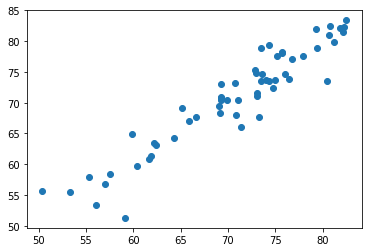

In [34]:
plt.scatter(label_test,pred)

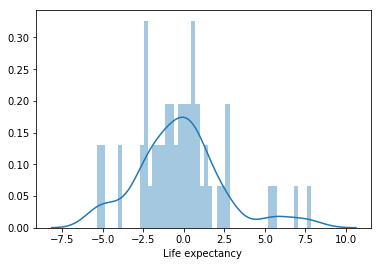

In [35]:
sea.distplot((label_test-pred),bins = 50)

In [36]:
!pip install watson-machine-learning-client

In [38]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

2020-06-13 12:55:32,811 - watson_machine_learning_client.wml_client_error - WARNING - Getting instance details failed. (GET https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/a4ca9868-67a9-4be0-99cd-a92c4a7c34c6)
Status code: 401, body: {"trace":"742e62c679c8cdbac0e4b183e1b39bfd","errors":[{"code":"authorization_rejected","message":"connection error","target":{"type":"header","name":"Authorization"}}]}


In [39]:
wml_credentials = {
    "apikey": "mKZQAac13JmU1wpjoGGn-Aj_oC5IdlQCN5v-c_HADOp-",
    "instance_id": "a4ca9868-67a9-4be0-99cd-a92c4a7c34c6",
    "url": "https://eu-gb.ml.cloud.ibm.com"
}

In [41]:
client = WatsonMachineLearningAPIClient(wml_credentials)

ApiRequestFailure: Getting instance details failed. (GET https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/a4ca9868-67a9-4be0-99cd-a92c4a7c34c6)
Status code: 401, body: {"trace":"742e62c679c8cdbac0e4b183e1b39bfd","errors":[{"code":"authorization_rejected","message":"connection error","target":{"type":"header","name":"Authorization"}}]}

In [ ]:
model_prop